## Download Data

For this project, I'll work with [boston dataset](https://openml.org/search?type=data&status=any&id=43465). I downloaded it using the cell below:

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml(name='Boston-house-price-data', version=1, parser="auto")

## Part 1: Examine Dataset
I first examine the dataset. Then, I create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings.

In [ ]:
#view dataset
dataset

{'data':         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  3

In [ ]:
import pandas as pd
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
# number of features
len(df.columns)

13

In [ ]:
df['target'] = dataset['target']
# median target value
df['target'].median()

21.2

In [ ]:
# participants greater than median target
above_med = df.loc[df['target'] > df['target'].median()]
len(above_med)

250


I add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the owner-occupied homes value in \$1000's below median or the owner-occupied homes value in \$1000's above median.

In [ ]:
# create new target
df['new_target'] = np.where(df['target'] >= df['target'].median(), 1, 0)
# view the result
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,new_target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1


### Splitting the data

I split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset['data'], df['new_target'], test_size=0.3, random_state=0)

# combine train data
train_data = X_train.copy()
train_data['target'] = Y_train

# combine test data
test_data = X_test.copy()
test_data['target'] = Y_test

### Effect of Standardization (Visual)
I use `seaborn.lmplot` to visualize a few features of the training set. I draw a plot where the x-axis is the *proportion of owner-occupied units built prior to 1940* i.e. ``AGE``, the y-axis is the *weighted distances to five Boston employment centres* i.e. ``DIS``, and the color of each datapoint indicates its class.  


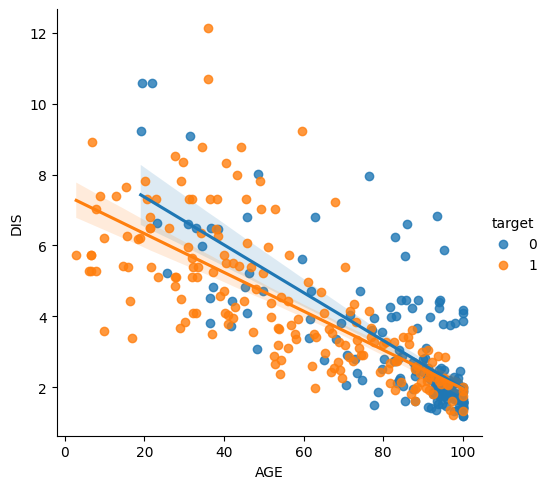

In [ ]:
import seaborn

# berfore standardization
seaborn.lmplot(x='AGE', y='DIS', hue='target', data= train_data)

I show another plot as above, but standardize the two features this time for comparison.

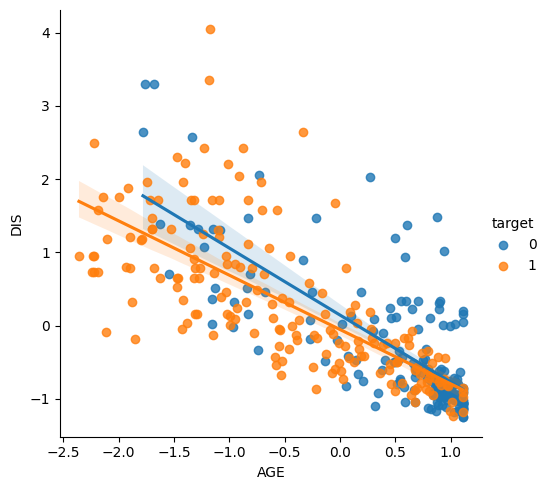

In [ ]:
# create copy
train_standardized = train_data.copy()

# standardize age
mu_age,si_age = train_standardized['AGE'].mean(), train_standardized['AGE'].std()
train_standardized['AGE'] -= mu_age #Subtract the mean
train_standardized['AGE'] /= si_age #Divide by the standard deviation

# standardize dis
mu_dis,si_dis = train_standardized['DIS'].mean(), train_standardized['DIS'].std()
train_standardized['DIS'] -= mu_dis #Subtract the mean
train_standardized['DIS'] /= si_dis #Divide by the standard deviation

seaborn.lmplot(x='AGE', y='DIS', hue='target', data= train_standardized)

My observation:

The scale of axis in the plots are difference. Before standardization, x-axis ranges from 0 to 100 and y-axis ranges from 0 to 12; after standardization, x-axis ranges from -2.5 to 1.0 and y-axis ranges from -1 to 4.

But their pattern and distribution are similar. This is because standardization is a linear transformation, so it will not change the distribution of original data. It will only compress or stretch along the same axis.

Distance algorithms like KNN are sensitive to the ranges of different features. Features with larger ranges can dominate the results. The advantage of standardization is that it can ensure all features are on the same scale, so that they contribute equally to the result.


## Part 2: KNN Classifier without Standardization
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a house has the owner-occupied homes value that is less than the median or greater than the median.

My steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`.
2.   Find the best `k` and the highest cross-validation accuracy?
3. Comment on  which ranges of `k` lead to underfitted or overfitted models.



k is 1 Training accuracy: 1.0 Validation accuracy: 0.8023340040241449
k is 2 Training accuracy: 0.9032573533071219 Validation accuracy: 0.7712273641851106
k is 3 Training accuracy: 0.9138530831632907 Validation accuracy: 0.8023340040241449
k is 4 Training accuracy: 0.8863036878514906 Validation accuracy: 0.7993963782696177
k is 5 Training accuracy: 0.8806474891753346 Validation accuracy: 0.7825352112676056
k is 6 Training accuracy: 0.8636963121485094 Validation accuracy: 0.7966599597585512
k is 7 Training accuracy: 0.8615811476633655 Validation accuracy: 0.7882494969818914
k is 8 Training accuracy: 0.8453341959886528 Validation accuracy: 0.7711871227364184
k is 9 Training accuracy: 0.8319290300104514 Validation accuracy: 0.773963782696177
k is 10 Training accuracy: 0.8206290748021701 Validation accuracy: 0.7711468812877265
k is 11 Training accuracy: 0.8185139103170258 Validation accuracy: 0.7824547283702212
k is 12 Training accuracy: 0.8142786044891256 Validation accuracy: 0.7824949698

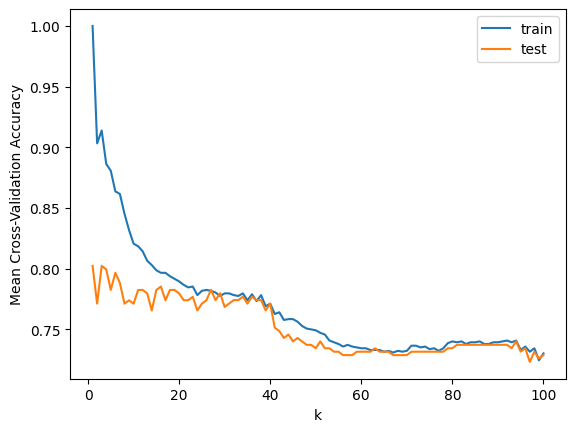

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

score_train = []  # record training accuracy
score_test = []  # record validation accuracy
k_range = range(1,101)

# train knn
for k in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train, Y_train, cv=5, return_train_score=True)
  score_train.append(scores['train_score'].mean())
  score_test.append(scores['test_score'].mean())
  print('k is',k,'Training accuracy:', scores['train_score'].mean(),'Validation accuracy:',scores['test_score'].mean())

# plot
plt.plot(k_range, score_train, label='train')
plt.plot(k_range, score_test, label='test')
plt.xlabel('k')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.legend()
plt.show()

The best k is 27 and its cross-validation accuracy is 78.25%. The overall highest cross-validation accuracy is 80.23% at k = 3 but I didn't pick it as best k because k is overfitted at that point. There is a huge gap between training curve and validation curve. But between 20 to 40, the model is stable and k=27 yields the highest cross-validation accuracy in this range.

k is underfitted from 40 to 100 and overfitted before 22. From k = 40 to 100, both training and validation accuracy are slowly decreasing and they are close to each other. Before 22, there is a obivious gap between training curve and validation curve. Training accuracy are very high and it gets closer to 100% as k approach to 1 while validation accuracy doesn't change much when k approach to 1. From 22 to 40, the model is good and k=27 yields the highest cross-validation accuracy in this range.

## Part 3: Feature Selection
In this part, I aim to investigate the importance of each feature on the final classification accuracy.

To find more important features I will use a decision tree. based on a decision tree I can compute feature importance that is a metric for our feature selection (code is provided below).


After I identify and remove the least important feature and evaluate a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, I need to repeat the process and remove another feature.


I design a function ( `Feature_selector`) that accepts my dataset (X_train , y_train) and a threshold as inputs and:
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until I meet the stop condition (step 7).

7. I will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, I accept a threshold as an input argument. For example, if threshold=0.95 I do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. My function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize my results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features.

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  

* State what is the number of essential features for classification and justify.
  
  









In [ ]:
def Feature_selector (X_train , y_train, tr=0.95):

  from sklearn import tree

  # fit a decision tree classifier
  dt = tree.DecisionTreeClassifier(random_state=0)
  X_train = pd.DataFrame(data=X_train, columns=dataset['feature_names'])
  dt.fit(X_train, y_train)

  # calculate importance score
  importance = dt.feature_importances_
  # add feature name to match score
  importance = pd.DataFrame(data=importance, columns=['importance_score'])
  importance['feature_name'] = dataset['feature_names']
  # sort ascending
  importance = importance.sort_values('importance_score')

  # run inital knn with full features
  score_test = []  # record validation accuracy
  for k in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
    score_test.append(scores['test_score'].mean())

  # store results
  full_feature_acc = max(score_test)  # highest cv accuracy for full feature
  best_k = [score_test.index(full_feature_acc)]
  cv_accuracy = [full_feature_acc]  # mean cross-validation accuracy
  removed_f = [] # removed features

  while len(importance) > 1 and cv_accuracy[-1] > cv_accuracy[0]*tr:
    removed_f.append(importance.iloc[0, 1]) # store removed feature name
    importance = importance.iloc[1: , : ] # remove feature

    # train knn
    all_cv = []
    for k in range(1,101):
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      scores = cross_validate(knn, X_train[importance['feature_name']], y_train, cv=5, return_train_score=True)
      all_cv.append(scores['test_score'].mean())

    cv_accuracy.append(max(all_cv)) # store the best cv accuracy for this feature set
    best_k.append(all_cv.index(max(all_cv)) + 1) # store the best k

  return removed_f, best_k, cv_accuracy

In [ ]:
removed_features, best_k, cv_accuracy = Feature_selector(X_train, Y_train)

In [ ]:
# reverse accuracy list since it is recorded as the number of features decrease
cv_accuracy.reverse()

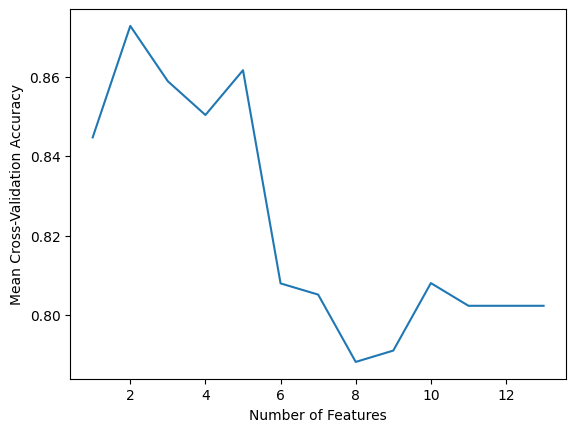

In [ ]:
# plot mean cross-validation accuracy vs. the number of features (x axis)
num_feature = range(1, len(dataset['feature_names'])+1)
plt.plot(num_feature, cv_accuracy)
plt.xlabel('Number of Features')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

In [ ]:
# reverse best_k list since it is recorded as the number of features decrease
best_k.reverse()

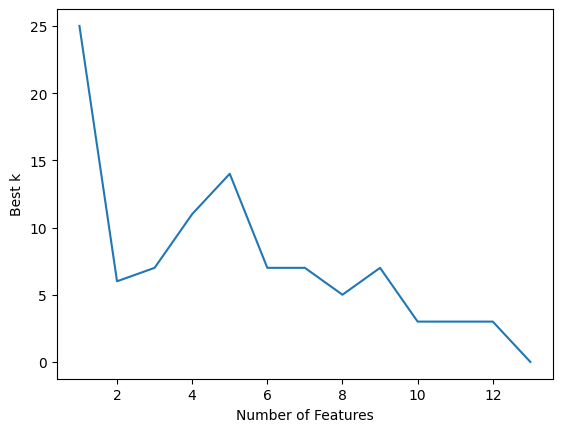

In [ ]:
# plot best k vs. the number of features (x axis)
num_feature = range(1, len(dataset['feature_names'])+1)
plt.plot(num_feature, best_k)
plt.xlabel('Number of Features')
plt.ylabel('Best k')
plt.show()

In [ ]:
cv_accuracy

[0.844708249496982,
 0.8727565392354124,
 0.8588329979879277,
 0.8503420523138832,
 0.861609657947686,
 0.8079678068410463,
 0.8051509054325955,
 0.7882092555331992,
 0.7910663983903421,
 0.8080482897384306,
 0.8023340040241449,
 0.8023340040241449,
 0.8023340040241449]

The number of essential features for classification is 2 because at this point, the mean cross-validation accuracy is the highest(87.28%). When number of features become 1, the cross-validation accuracy decreases.

## Part 4: Standardization


I fit the StandardScaler only on the training set. I transform both training and test sets with that scaler.

1. Standardize the training  and test data

2. Call my ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when I have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected my model and its performance.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
removed_features_scaled, best_k_scaled, cv_accuracy_scaled = Feature_selector(X_train_scaled, Y_train, 0.95)

In [ ]:
# reverse accuracy list to match the order
cv_accuracy_scaled.reverse()

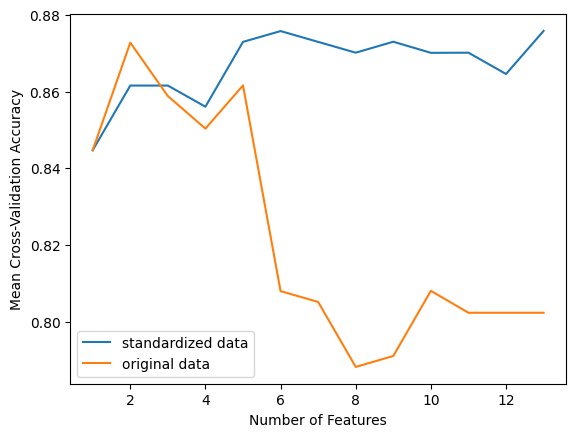

In [ ]:
# plot cross validation accuracy
plt.plot(num_feature, cv_accuracy_scaled, label='standardized data')
plt.plot(num_feature, cv_accuracy, label='original data')
plt.xlabel('Number of Features')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
best_k_scaled.reverse()

In [ ]:
best_k_scaled

[25, 37, 14, 10, 28, 4, 4, 11, 6, 2, 5, 7, 6]

In [ ]:
max(cv_accuracy_scaled)

0.8758148893360161

In [ ]:
max(cv_accuracy)

0.8727565392354124

Standardization helps improve the model and its performance. It can be seen that Cross-Validation accuracy increases sigfinicantly when number of features is greater than 4. For standardized data, the highest cv accuracy is 87.58% whereas the highest cv accuracy for original data is 87.28%

## Part 5: Decision Tree Classifier

I train a decision tree classifier on the standardized dataset, tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV), and compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

cv_dt = [] # store results for all combo of max_depth and min_samples_split
hyperparameters = [] # store combo of i and j
for i in range(2, 21): # min_samples_split
  for j in range(2, 21): # max_depth
    tree_model = DecisionTreeClassifier(min_samples_split=i, max_depth=j, random_state=0)
    scores = cross_validate(tree_model, X_train_scaled, Y_train, cv=5, return_train_score=True)
    cv_dt.append(scores['test_score'].mean())
    hyperparameters.append((i,j))

print('Best min_samples_split is', hyperparameters[cv_dt.index(max(cv_dt))][0])
print('Best max_depth is', hyperparameters[cv_dt.index(max(cv_dt))][1])
print('Highest cross-validation accuracy is', max(cv_dt))

Best min_samples_split is 2
Best max_depth is 3
Highest cross-validation accuracy is 0.8503018108651912


In [ ]:
# CV for knn with full features and standardized data
# use result from Part 4
print('Highest cross-validation accuracy for KNN is', cv_accuracy_scaled[-1])

Highest cross-validation accuracy for KNN is 0.8758148893360161


The best value for min_samples_split is 2 and the best value for max_depth is 3. The best cross-validation accuracy for Decision Tree is 85.03%, which is lower than the best cross-validation accuracy for KNN(87.58%).

## Part 6: Test Data

Now that I've created several models, I pick my best one (highest CV accuracy) and apply it to the test dataset I had initially set aside.

My best model is KNN with full features with k=6

In [ ]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

knn_6 = neighbors.KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train_scaled, Y_train) # use standardized data
accuracy = accuracy_score(Y_test, knn_6.predict(X_test_scaled)) # use standardized data
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  78.28947368421053 %


The test accuracy is 78.29%, which is good. This means that our model are performing well and can generalize on unseen data.

## Compile HTML file

In [4]:
%%shell
jupyter nbconvert --to html /content/Classification.ipynb

[NbConvertApp] Converting notebook /content/Classification.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 666939 bytes to /content/Classification.html
